## <center> Приведение ряда к стационарному виду</center>

In [1]:
import pandas as pd

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

In [2]:
data = pd.read_csv("monthly-milk-production.csv", sep=";")
data.head()

,month,milk
0,01.01.1962,589
1,01.02.1962,561
2,01.03.1962,640
3,01.04.1962,656
4,01.05.1962,727


<AxesSubplot:>

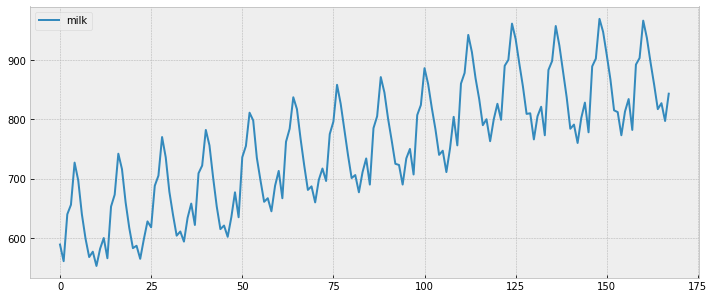

In [3]:
data.plot(figsize=(12,5))

 ### 1. Дифференцирование ряда

<AxesSubplot:>

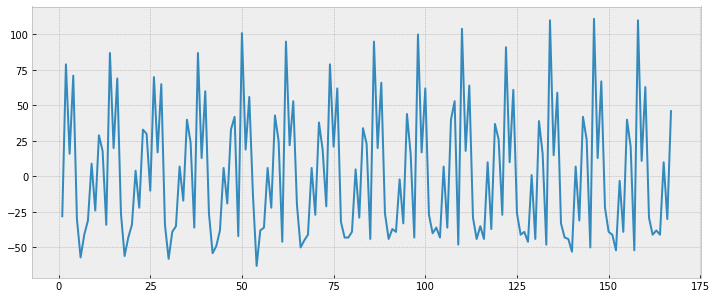

In [4]:
data_diff = (data.milk - data.milk.shift(1)).dropna()
data_diff.plot(figsize=(12,5))

Стационарен ли полученный ряд? Очиведно, что нет. Однако воспользуемся для проверки критерием Дики-Фуллера.

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
result = adfuller(data_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.054996
p-value: 0.030068
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577


На 1% уровне значимости гипотеза нестационарности принимается

### 2. Сезонное дифференцирование

<AxesSubplot:>

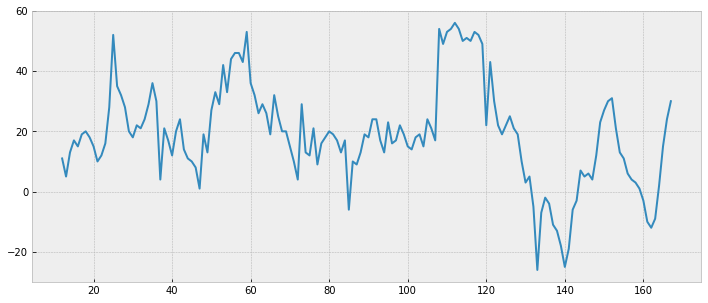

In [7]:
data_diff = (data.milk - data.milk.shift(12)).dropna()
data_diff.plot(figsize=(12,5))

In [8]:
result = adfuller(data_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.335419
p-value: 0.160799
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578


Гипотеза принимается на 5 % уровне значимости, ряд все ещё нестационарен

### 3. Комбинация методов

Произведем вначале сезонное дифференцирование, а затем обычное дифференцирование

<AxesSubplot:>

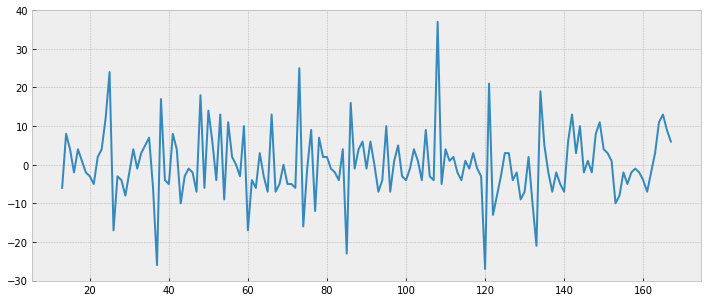

In [9]:
data_diff = (data.milk - data.milk.shift(12)).dropna()
data_diff = (data_diff - data_diff.shift(1)).dropna()
data_diff.plot(figsize=(12,5))

In [10]:
result = adfuller(data_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.038002
p-value: 0.000019
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578


Полученный ряд стационарен, что подтверждает критерий Дики-Фуллера.

 ## <center> Подбор параметров p, q, P, Q для SARIMA </center>

### 1. Начальное приближение для Q

Для полученного нестационарного ряда по автокорреляции определим начальное приближение для Q

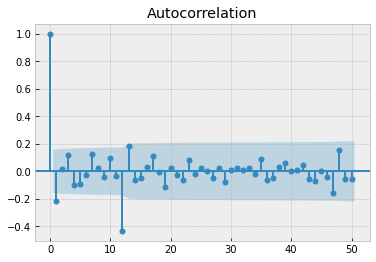

In [11]:
sm.graphics.tsa.plot_acf(data_diff.dropna().values.squeeze(), lags=50);

Q*S - номер последнего значимого сезонного лага, в данном случае сезонность не наблюдается,  Q = 1

### 2. Начальное приближение для p

Для полученного нестационарного ряда по частичной автокорреляции определим начальное приближение для p

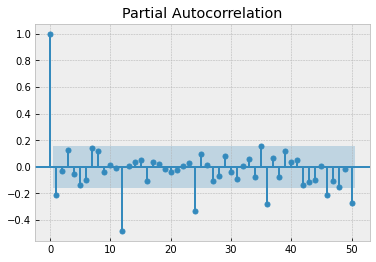

In [12]:
sm.graphics.tsa.plot_pacf(data_diff.dropna().values.squeeze(), lags=50);